# In this Jupyter Notebook, I will build regression models to predict salary (in millions) for MLB position players. I will experiment with different modeling techniques such as multivariate linear, lasso, ridge, and neural network regressions

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [ ]:
#read in position player stats
pp_train = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/MLB/pp_traindata1.csv')
pp_test = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/MLB/pp_testdata.csv')

# Final check for null values:

In [ ]:
#Looks like pp_train has a few null values so we drop them
pp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          280 non-null    int64  
 1   age                 280 non-null    int64  
 2   stints              280 non-null    int64  
 3   G                   279 non-null    float64
 4   tap                 279 non-null    float64
 5   AB                  279 non-null    float64
 6   R                   279 non-null    float64
 7   H                   279 non-null    float64
 8   db                  279 non-null    float64
 9   tr                  279 non-null    float64
 10  HR                  279 non-null    float64
 11  RBI                 279 non-null    float64
 12  SB                  279 non-null    float64
 13  CS                  279 non-null    float64
 14  BB                  279 non-null    float64
 15  SO                  279 non-null    float64
 16  IBB     

In [ ]:
pp_train = pp_train.dropna()

In [ ]:
pp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 279
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          279 non-null    int64  
 1   age                 279 non-null    int64  
 2   stints              279 non-null    int64  
 3   G                   279 non-null    float64
 4   tap                 279 non-null    float64
 5   AB                  279 non-null    float64
 6   R                   279 non-null    float64
 7   H                   279 non-null    float64
 8   db                  279 non-null    float64
 9   tr                  279 non-null    float64
 10  HR                  279 non-null    float64
 11  RBI                 279 non-null    float64
 12  SB                  279 non-null    float64
 13  CS                  279 non-null    float64
 14  BB                  279 non-null    float64
 15  SO                  279 non-null    float64
 16  IBB     

In [ ]:
#pp_test has no null values so we are good
pp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          70 non-null     int64  
 1   age                 70 non-null     int64  
 2   stints              70 non-null     int64  
 3   G                   70 non-null     float64
 4   tap                 70 non-null     float64
 5   AB                  70 non-null     float64
 6   R                   70 non-null     float64
 7   H                   70 non-null     float64
 8   db                  70 non-null     float64
 9   tr                  70 non-null     float64
 10  HR                  70 non-null     float64
 11  RBI                 70 non-null     float64
 12  SB                  70 non-null     float64
 13  CS                  70 non-null     float64
 14  BB                  70 non-null     float64
 15  SO                  70 non-null     float64
 16  IBB       

In [ ]:
#drop unnamed index column from both datasets
#also drop the at bats feature since I am now realizing the redunancy here when tap (total plate appearances) contains very similar info
pp_train.drop(columns = ['Unnamed: 0', 'AB'], inplace = True)
pp_test.drop(columns = ['Unnamed: 0', 'AB'], inplace = True)
pp_test.head()

,age,stints,G,tap,R,H,db,tr,HR,RBI,...,C,DH,OF,P,SS,bats_B,bats_L,bats_R,throws_L,throws_R
0,32,1,72.0,251.0,19.0,48.0,12.0,0.0,12.0,41.0,...,1,0,0,0,0,0,0,1,0,1
1,31,1,161.0,680.0,97.0,155.0,25.0,1.0,34.0,97.0,...,0,0,0,0,0,0,0,1,0,1
2,25,1,75.0,248.0,15.0,39.0,9.0,1.0,0.0,15.0,...,0,0,1,0,0,0,0,1,0,1
3,24,1,77.0,288.0,28.0,67.0,11.0,4.0,6.0,26.0,...,0,0,0,0,0,0,0,1,0,1
4,23,1,30.0,80.0,4.0,18.0,6.0,0.0,0.0,4.0,...,0,0,0,0,1,1,0,0,0,1


# Reminding ourselves of the train and test data shapes (we performed an 80-20 split previously then normalized both independently)

In [ ]:
print('Position Players Train:')
print('Train dataset dimensions: ', pp_train.shape, '\n')

print('Position Players Test:')
print('Test dataset dimensions: ', pp_test.shape, '\n')

Position Players Train:
Train dataset dimensions:  (279, 43) 

Position Players Test:
Test dataset dimensions:  (70, 43) 



# Normalize input features using min-max normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
train_target = pp_train['salary']

train_features = pp_train.drop(columns = ['salary'])
col = train_features.columns
train_features = scaler.fit_transform(train_features)
train_features = pd.DataFrame(data=train_features, columns=col)

In [ ]:
test_target = pp_test['salary']

test_features = pp_test.drop(columns = ['salary'])
test_features = scaler.fit_transform(test_features)
test_features = pd.DataFrame(data=test_features, columns=col)

# Feature Selection

Vary the number of features we select to find optimal amount. I found that k = 12 features produces the best model with MAE of 3.49 million

In [ ]:
top_features_ordered = []

In [ ]:
best_features = SelectKBest(f_regression, k=15)
k_best_data = best_features.fit_transform(train_features, train_target)
mask = best_features.get_support()
new_features = train_features.columns[mask]
for item in new_features:
  if item not in top_features_ordered:
    top_features_ordered.append(item)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [ ]:
count = 1
for item in top_features_ordered:
  print(count, '. ', item)
  count += 1

1 .  age
2 .  G
3 .  tap
4 .  R
5 .  H
6 .  db
7 .  HR
8 .  RBI
9 .  BB
10 .  SF
11 .  GIDP
12 .  obp
13 .  PRO
14 .  GURU
15 .  Rookie contract


In [ ]:
top_features_ordered

['age',
 'G',
 'tap',
 'R',
 'H',
 'db',
 'HR',
 'RBI',
 'BB',
 'SF',
 'GIDP',
 'obp',
 'PRO',
 'GURU',
 'Rookie contract']

In [ ]:
#through experimentation, I found that 6-10 features produce the best regression models. Above, I have the 15 best features for predicting
#player salary for position players. However, when all 15 are used the models don't perform well so I select different combinations of the fiften
#and experiment to see which lead to high performing models

Through experimentation, I found the following regarding which features make the models better, worse, or have neglible


*   Neutral - GURU, BB, Rookie contract
*   Medium Importance- H
*   Not Helpful - SF, R 
*   Crucial - GIDP, G, age, PRO, ops


In [ ]:
#below are the different feature combinations I experimented with

#1.train_selected_X = train_features[['age', 'G', 'RBI', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops']] linear: 3.39, ridge(a = 3.6): 3.35, decision tree: 2.89
#2. train_selected_X = train_features[['age', 'G', 'tap', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops', 'RBI']] linear: 3.50, ridge (a= 3.6): 3.34, decision tree: 2.57
#3.train_selected_X = train_features[['age', 'G', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops', 'RBI']] linear: 3.39, ridge(a = 1.0): 3.37, decision tree: 2.89
#4. train_selected_X = train_features[['age', 'H', 'GIDP', 'PRO', 'Rookie contract', 'slg', 'G', 'obp']] linear: 3.38, ridge (a = 1.0): 3.35, decision tree: 3.00
#5. train_selected_X = train_features[['age', 'G', 'GIDP', 'PRO', 'ops']] linear: 3.43, ridge (a = 1.0): 3.38, decision tree: 3.08

#I found the best feature combination to be 'age', 'G', 'RBI', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops' for linear and ridge regressions
#and 'age', 'G', 'tap', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops', 'RBI' for decision tree models

train_selected_X = train_features[['age', 'G', 'RBI', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops']]
train_selected_dt_X = train_features[['age', 'G', 'tap', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops', 'RBI']]

train_y = train_target


#1. test_selected_X = test_features[['age', 'G', 'RBI', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops']]
#2. test_selected_X = test_features[['age', 'G', 'tap', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops', 'RBI']]
#3. test_selected_X = test_features[['age', 'G', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops', 'RBI']]
#4. test_selected_X = test_features[['age', 'H', 'GIDP', 'PRO', 'Rookie contract', 'slg', 'G', 'obp']]
#5. test_selected_X = test_features[['age', 'G', 'GIDP', 'PRO', 'ops']]


test_selected_X = test_features[['age', 'G', 'RBI', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops']]
test_selected_dt_X = test_features[['age', 'G', 'tap', 'H', 'GIDP', 'PRO', 'Rookie contract', 'ops', 'RBI']]

test_y = test_target

#neutral - GURU, BB, Rookie contract
#medium importance- Hits, 
#not helpful - SF, R, 
#crucial - GIDP, G, age, PRO, ops

test_y = test_target

In [ ]:
print('Train Features:')
print('train_selected_X dimensions: ', train_selected_X.shape)
print('train_y dimensions:', train_y.shape, '\n')

print('Test Features:')
print('test_data_X dimensions: ', test_selected_X.shape)
print('test_data_y dimensions:', test_y.shape, '\n')

Train Features:
train_selected_X dimensions:  (279, 8)
train_y dimensions: (279,) 

Test Features:
test_data_X dimensions:  (70, 8)
test_data_y dimensions: (70,) 



# Multivariate Linear Regression

In [ ]:
multivariate_regression = linear_model.LinearRegression()
multivariate_regression.fit(train_selected_X, train_y)

LinearRegression()

# Beta values (coefficients) and intercept for our multivariate linear regression:

In [ ]:
multivariate_regression.coef_

array([18.52392221, -9.3448351 , -2.64652833, -3.67020106,  6.47866356,
       22.15176025,  0.96789912, -5.06003056])

In [ ]:
multivariate_regression.intercept_

-3.433813074304056

In [ ]:
y_pred = multivariate_regression.predict(test_selected_X)

In [ ]:
print('Mean Squared Error: ', mean_squared_error(test_y, y_pred), '\n')
print('Mean Absolute Error: ', mean_absolute_error(test_y, y_pred), '\n')
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(test_y, y_pred)))

Mean Squared Error:  20.957202516377947 

Mean Absolute Error:  3.3962689166115063 

Root Mean Squared Error:  4.577903725110211


# Ridge Regression

In [ ]:
ridge_regression = Ridge(alpha = 3.75)
ridge_regression.fit(train_selected_X, train_y)

Ridge(alpha=3.75)

In [ ]:
ridge_regression.coef_

array([10.90462975, -1.56906025,  1.83499279,  1.94039775,  4.71768259,
        3.63095343, -1.19300745, -0.11721738])

In [ ]:
ridge_regression.intercept_

-3.4056725614139216

In [ ]:
y_predicted = ridge_regression.predict(test_selected_X)

In [ ]:
print('Mean Squared Error: ', mean_squared_error(test_y, y_predicted), '\n')
print('Mean Absolute Error: ', mean_absolute_error(test_y, y_predicted), '\n')
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(test_y, y_predicted)))

Mean Squared Error:  21.672263387737477 

Mean Absolute Error:  3.3513426972141893 

Root Mean Squared Error:  4.655347826719018


# Lasso Regression

In [ ]:
lasso_regression = Lasso(alpha = 2.0)
lasso_regression.fit(train_selected_X, train_y)

Lasso(alpha=2.0)

In [ ]:
lasso_regression.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0., -0.,  0.])

In [ ]:
lasso_regression.intercept_

4.435841802867383

In [ ]:
y_predicted_lasso = lasso_regression.predict(test_selected_X)

In [ ]:
print('Mean Squared Error: ', mean_squared_error(test_y, y_predicted_lasso), '\n')
print('Mean Absolute Error: ', mean_absolute_error(test_y, y_predicted_lasso), '\n')
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(test_y, y_predicted_lasso)))

Mean Squared Error:  41.093660018288 

Mean Absolute Error:  4.860481701228878 

Root Mean Squared Error:  6.41043368410344


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth=6, max_features='log2')

In [ ]:
dt_regressor.fit(train_selected_dt_X, train_y)

DecisionTreeRegressor(max_depth=6, max_features='log2')

In [ ]:
y_pred_dt = dt_regressor.predict(test_selected_dt_X)

In [ ]:
print('Mean Squared Error: ', mean_squared_error(test_y, y_pred_dt), '\n')
print('Mean Absolute Error: ', mean_absolute_error(test_y, y_pred_dt), '\n')
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(test_y, y_pred_dt)))

Mean Squared Error:  17.364328678946094 

Mean Absolute Error:  2.5770589302568223 

Root Mean Squared Error:  4.167052756918983


In [ ]:
dt_regressor2 = DecisionTreeRegressor(max_depth=3)

In [ ]:
dt_regressor2.fit(train_selected_dt_X, train_y)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_pred_dt = dt_regressor2.predict(test_selected_dt_X)

In [ ]:
print('Mean Squared Error: ', mean_squared_error(test_y, y_pred_dt), '\n')
print('Mean Absolute Error: ', mean_absolute_error(test_y, y_pred_dt), '\n')
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(test_y, y_pred_dt)))

Mean Squared Error:  22.12672321417289 

Mean Absolute Error:  2.8057235292678677 

Root Mean Squared Error:  4.7039051025900696


# Regression with Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

# Neural Network #1

*   Input Layer - 42 input features
*   Hidden Layer 1 - 15 neurons, relu activation
*   Hidden Layer 2 - 15 neurons, tanh activation
*   Hidden Layer 3 - 15 neurons, relu activation
*   Output Layer - 1 predicted salary


# Performance
*   Final MAE : 2.2802
*   Final Val_MAE: 2.6057

In [ ]:
tf.random.set_seed(5)

network1 = tf.keras.models.Sequential()
network1.add(tf.keras.Input(shape=(42,)))
network1.add(tf.keras.layers.Dense(15, activation='relu'))
network1.add(tf.keras.layers.Dense(15, activation='tanh'))
network1.add(tf.keras.layers.Dense(15, activation='relu'))
network1.add(tf.keras.layers.Dense(1))

network1.compile(
   loss=tf.keras.losses.MeanAbsoluteError(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics='mean_absolute_error')

history1 = network1.fit(train_features, train_target, epochs=75,validation_data=(test_features,test_target))

Epoch 1/75
9/9 [==============================] - 1s 27ms/step - loss: 4.2449 - mean_absolute_error: 4.2449 - val_loss: 4.2371 - val_mean_absolute_error: 4.2371
Epoch 2/75
9/9 [==============================] - 0s 7ms/step - loss: 3.9635 - mean_absolute_error: 3.9635 - val_loss: 4.1108 - val_mean_absolute_error: 4.1108
Epoch 3/75
9/9 [==============================] - 0s 5ms/step - loss: 3.8790 - mean_absolute_error: 3.8790 - val_loss: 4.0657 - val_mean_absolute_error: 4.0657
Epoch 4/75
9/9 [==============================] - 0s 5ms/step - loss: 3.8497 - mean_absolute_error: 3.8497 - val_loss: 4.0385 - val_mean_absolute_error: 4.0385
Epoch 5/75
9/9 [==============================] - 0s 8ms/step - loss: 3.8255 - mean_absolute_error: 3.8255 - val_loss: 4.0124 - val_mean_absolute_error: 4.0124
Epoch 6/75
9/9 [==============================] - 0s 8ms/step - loss: 3.7976 - mean_absolute_error: 3.7976 - val_loss: 3.9838 - val_mean_absolute_error: 3.9838
Epoch 7/75
9/9 [=======================

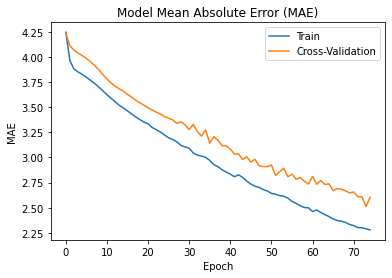

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

# Neural Network #2

*   Input Layer - 42 input features
*   Hidden Layer 1 - 15 neurons, relu activation
*   Hidden Layer 2 - 15 neurons, relu activation
*   Hidden Layer 3 - 15 neurons, relu activation
*   Output Layer - 1 predicted salary


# Performance
*   Final MAE : 2.3557 
*   Final Val_MAE: 2.4179

In [ ]:
tf.random.set_seed(5)

network2 = tf.keras.models.Sequential()
network2.add(tf.keras.Input(shape=(42,)))
network2.add(tf.keras.layers.Dense(15, activation='relu'))
network2.add(tf.keras.layers.Dense(15, activation='relu'))
network2.add(tf.keras.layers.Dense(15, activation='relu'))
network2.add(tf.keras.layers.Dense(1))

network2.compile(
   loss=tf.keras.losses.MeanAbsoluteError(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics='mean_absolute_error')

history2 = network2.fit(train_features, train_target, epochs=77,validation_data=(test_features,test_target))

Epoch 1/77
9/9 [==============================] - 1s 25ms/step - loss: 4.3053 - mean_absolute_error: 4.3053 - val_loss: 4.3583 - val_mean_absolute_error: 4.3583
Epoch 2/77
9/9 [==============================] - 0s 5ms/step - loss: 4.0744 - mean_absolute_error: 4.0744 - val_loss: 4.1847 - val_mean_absolute_error: 4.1847
Epoch 3/77
9/9 [==============================] - 0s 7ms/step - loss: 3.9430 - mean_absolute_error: 3.9430 - val_loss: 4.1016 - val_mean_absolute_error: 4.1016
Epoch 4/77
9/9 [==============================] - 0s 5ms/step - loss: 3.8760 - mean_absolute_error: 3.8760 - val_loss: 4.0479 - val_mean_absolute_error: 4.0479
Epoch 5/77
9/9 [==============================] - 0s 8ms/step - loss: 3.8488 - mean_absolute_error: 3.8488 - val_loss: 4.0063 - val_mean_absolute_error: 4.0063
Epoch 6/77
9/9 [==============================] - 0s 6ms/step - loss: 3.8227 - mean_absolute_error: 3.8227 - val_loss: 3.9776 - val_mean_absolute_error: 3.9776
Epoch 7/77
9/9 [=======================

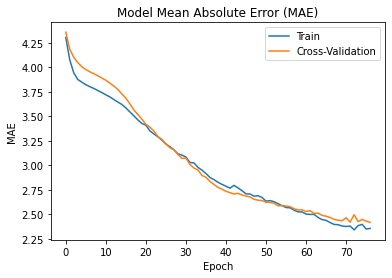

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

# Trying the neural network feeding in only the selected features we chose for our linear and ridge models

# Neural Network #3

*   Input Layer - 8 selected input features
*   Hidden Layer 1 - 20 neurons, relu activation
*   Hidden Layer 2 - 20 neurons, relu activation
*   Hidden Layer 3 - 20 neurons, relu activation
*   Hidden Layer 4 - 20 neurons, relu activation
*   Output Layer - 1 predicted salary

# Performance
*   Final MAE : 2.5184
*   Final Val_MAE: 2.5123

In [ ]:
tf.random.set_seed(5)

network3 = tf.keras.models.Sequential()
network3.add(tf.keras.Input(shape=(8,)))
network3.add(tf.keras.layers.Dense(20, activation='relu'))
network3.add(tf.keras.layers.Dense(20, activation='relu'))
network3.add(tf.keras.layers.Dense(20, activation='relu'))
network3.add(tf.keras.layers.Dense(20, activation='relu'))
network3.add(tf.keras.layers.Dense(1))

network3.compile(
   loss=tf.keras.losses.MeanAbsoluteError(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics='mean_absolute_error')

history3 = network3.fit(train_selected_X, train_target, epochs=80,validation_data=(test_selected_X,test_target))

Epoch 1/80
9/9 [==============================] - 1s 24ms/step - loss: 4.4178 - mean_absolute_error: 4.4178 - val_loss: 4.5165 - val_mean_absolute_error: 4.5165
Epoch 2/80
9/9 [==============================] - 0s 5ms/step - loss: 4.2579 - mean_absolute_error: 4.2579 - val_loss: 4.3495 - val_mean_absolute_error: 4.3495
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 4.0575 - mean_absolute_error: 4.0575 - val_loss: 4.1795 - val_mean_absolute_error: 4.1795
Epoch 4/80
9/9 [==============================] - 0s 7ms/step - loss: 3.9321 - mean_absolute_error: 3.9321 - val_loss: 4.0900 - val_mean_absolute_error: 4.0900
Epoch 5/80
9/9 [==============================] - 0s 6ms/step - loss: 3.8756 - mean_absolute_error: 3.8756 - val_loss: 4.0239 - val_mean_absolute_error: 4.0239
Epoch 6/80
9/9 [==============================] - 0s 5ms/step - loss: 3.8159 - mean_absolute_error: 3.8159 - val_loss: 3.9664 - val_mean_absolute_error: 3.9664
Epoch 7/80
9/9 [=======================

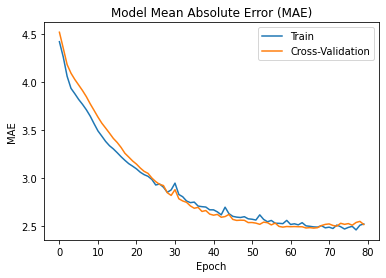

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history3.history['mean_absolute_error'])
plt.plot(history3.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

# Summary of Neural Network Results for predicing position player salary

In [ ]:
neural_network_results = pd.DataFrame(columns = ['Input Features Count', 'Hidden Layers', 'Layers', 'Epochs','Mean Absolute Error', 'Val Mean Absolute Error'])
neural_network_results['Input Features Count'] = [42,42,8]
neural_network_results['Hidden Layers'] = [3,3,4]
neural_network_results['Epochs'] = [75,77,80]
neural_network_results['Layers'] = ['Relu (15), Tanh (15), Relu (15)','Relu (15), Relu (15), Relu (15)', 'Relu (20), Relu (20), Relu (20), Relu (20)']
neural_network_results['Mean Absolute Error'] = [2.2802, 2.3557, 2.5184]
neural_network_results['Val Mean Absolute Error'] = [2.6057, 2.4179, 2.5123]

In [ ]:
neural_network_results

,Input Features Count,Hidden Layers,Layers,Epochs,Mean Absolute Error,Val Mean Absolute Error
0,42,3,"Relu (15), Tanh (15), Relu (15)",75,2.2802,2.6057
1,42,3,"Relu (15), Relu (15), Relu (15)",77,2.3557,2.4179
2,8,4,"Relu (20), Relu (20), Relu (20), Relu (20)",80,2.5184,2.5123
